# Tripertite

description to be added

## Initialize

In [3]:
# -*- coding:utf8 -*-
import json
import pandas as pd
import matplotlib.pyplot as plt

from Class.SpectrumInfo import SpectrumInfo
from Class.Graph import Graph

In [4]:
BASE_PATH = '../# TestModel'

OUTPUT_DIR_PATH = f'{BASE_PATH}/output'
INPUT_SPECTRUM_FILE_PATH = f'{BASE_PATH}/input/vel spectra.csv'
INPUT_CONFIG_DIR_PATH = f'{BASE_PATH}/input/configs'
INPUT_CONFIG_FILE_NAMES = [
  'All L1',
  'All L2',
]


## Draw TriperTite

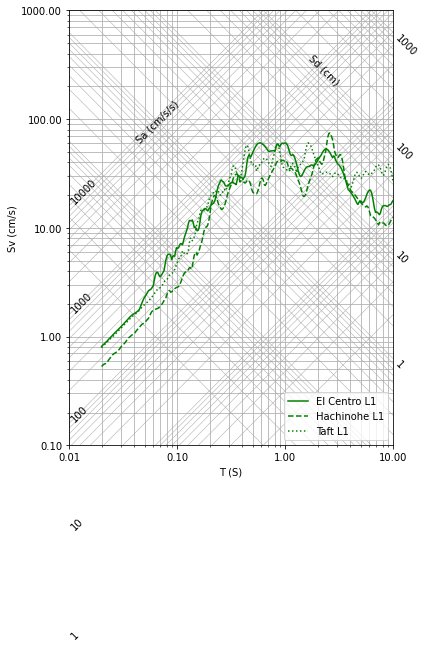

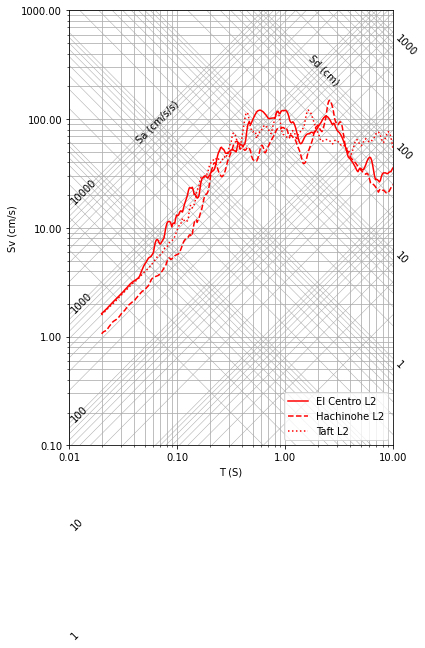

In [5]:
for configName in INPUT_CONFIG_FILE_NAMES:


  # Read config
  with open(f'{INPUT_CONFIG_DIR_PATH}/{configName}.json') as f:
    config = json.load(f)
    graph = Graph(config['graph'])
    specInfoList = [SpectrumInfo(spectrumDict) for spectrumDict in config['spectra']]


  # Draw Tripertite
  for specInfo in specInfoList:
    df = pd.read_csv(INPUT_SPECTRUM_FILE_PATH)
    X = df[df.columns[0]].values
    Y = df[specInfo.Name].values
    graph.DrawVelSpectrumLine(X, Y, specInfo.Name, specInfo.Color, specInfo.LineStyle)
  graph.DrawPeriodLine()
  graph.Format()


  # Save and show fig
  plt.savefig(f'{OUTPUT_DIR_PATH}/result {configName}.png', dpi=graph.Dpi)
  plt.show()